In [32]:
import pandas as pd
import numpy as np
from datetime import *
import matplotlib.pyplot as plt
import glob
import dateutil
from google.colab import drive
drive.mount('/content/drive')
data1 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_63.csv')
data2 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_64.csv')
data3 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_65.csv')
data4 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_66.csv')
data5 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_67.csv')
data6 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_68.csv')
data7 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_69.csv')
data8 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_70.csv')
data9 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_71.csv')
data10 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_72.csv')
data11 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_73.csv')
data12 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_74.csv')
data13 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_75.csv')
data14 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_76.csv')
data15 = pd.read_csv('/content/drive/MyDrive/DATA_use_case/LCL-June2015v2_77.csv')
data_concat = pd.concat([data1,data2 , data3, data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15 ])

data_concat['DateTime'] = pd.to_datetime(data_concat['DateTime'])


mesures = len(data_concat)
compteurs =len( data_concat.groupby('LCLid').nunique())




Data = data_concat[[ 'LCLid' ,'DateTime' , 'KWH/hh (per half hour) ' ]]
Data['year'] = pd.DatetimeIndex(data_concat['DateTime']).year
Data['month'] = pd.DatetimeIndex(data_concat['DateTime']).month
Data['day'] = pd.DatetimeIndex(data_concat['DateTime']).day
Data['Hour'] = pd.DatetimeIndex(data_concat['DateTime']).hour
Data['Minute '] = pd.DatetimeIndex(data_concat['DateTime']).minute




df =  data_concat.groupby(['LCLid'])['KWH/hh (per half hour) ']


data_concat['KWH/hh (per half hour) ']=pd.to_numeric(data_concat['KWH/hh (per half hour) '],errors='coerce')


nombre_compteurs = data_concat["LCLid"].value_counts()


data_sum = data_concat.groupby(['LCLid'])['KWH/hh (per half hour) '].sum()
data_max = data_concat.groupby(['LCLid'])['KWH/hh (per half hour) '].max()
data_min = data_concat.groupby(['LCLid'])['KWH/hh (per half hour) '].min()
data_Mean = data_concat.groupby(['LCLid'])['KWH/hh (per half hour) '].mean()



del data_concat["stdorToU"]






paramètres_consom1 = pd.DataFrame({'Totale':data_sum ,
                   'Minimale':data_min ,'Maximale':data_max ,'Moyenne':data_Mean ,'Nombre de compteur ' :nombre_compteurs})



Data["Weekday"] = Data["DateTime"].dt.day_name()
Data["month"] = Data["DateTime"].dt.month_name()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
Data

,LCLid,DateTime,KWH/hh (per half hour),year,month,day,Hour,Minute,Weekday
0,MAC002543,2013-08-07 02:30:00,0.041,2013,August,7,2,30,Wednesday
1,MAC002543,2013-08-07 03:00:00,0.042,2013,August,7,3,0,Wednesday
2,MAC002543,2013-08-07 03:30:00,0.035,2013,August,7,3,30,Wednesday
3,MAC002543,2013-08-07 04:00:00,0.036,2013,August,7,4,0,Wednesday
4,MAC002543,2013-08-07 04:30:00,0.035,2013,August,7,4,30,Wednesday
...,...,...,...,...,...,...,...,...,...
999995,MAC003190,2013-04-17 20:30:00,0.34,2013,April,17,20,30,Wednesday
999996,MAC003190,2013-04-17 21:00:00,0.329,2013,April,17,21,0,Wednesday
999997,MAC003190,2013-04-17 21:30:00,0.345,2013,April,17,21,30,Wednesday
999998,MAC003190,2013-04-17 22:00:00,0.211,2013,April,17,22,0,Wednesday


In [34]:
data_concat.isnull()

,LCLid,DateTime,KWH/hh (per half hour)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
999995,False,False,False
999996,False,False,False
999997,False,False,False
999998,False,False,False


In [35]:
data_concat.dropna(how='all', inplace=True)
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   LCLid                    object        
 1   DateTime                 datetime64[ns]
 2   KWH/hh (per half hour)   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 457.8+ MB


In [36]:
data_concat.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 15000000, dtype: bool

In [37]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   LCLid                    object        
 1   DateTime                 datetime64[ns]
 2   KWH/hh (per half hour)   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 457.8+ MB


In [38]:
paramètres_consom1 = pd.DataFrame({'Totale':data_sum ,
                   'Minimale':data_min ,'Maximale':data_max ,'Moyenne':data_Mean ,'Nombre de Mesure  ' :nombre_compteurs})
paramètres_consom1

,Totale,Minimale,Maximale,Moyenne,Nombre de Mesure
MAC002543,497.303000,0.016,1.254,0.050534,9841
MAC002544,9095.584000,0.046,3.752,0.316401,28748
MAC002545,1395.718000,0.006,1.614,0.057945,24088
MAC002546,4342.496000,0.032,1.267,0.151301,28702
MAC002547,5523.201000,0.034,1.615,0.192138,28747
...,...,...,...,...,...
MAC003186,9890.041002,0.077,3.372,0.387586,25518
MAC003187,4067.343000,0.023,1.504,0.159385,25520
MAC003188,11689.897999,0.054,2.892,0.458050,25522
MAC003189,5221.628000,0.004,2.158,0.204553,25528


In [39]:
data_sum

LCLid
MAC002543      497.303000
MAC002544     9095.584000
MAC002545     1395.718000
MAC002546     4342.496000
MAC002547     5523.201000
                 ...     
MAC003186     9890.041002
MAC003187     4067.343000
MAC003188    11689.897999
MAC003189     5221.628000
MAC003190     2149.912000
Name: KWH/hh (per half hour) , Length: 509, dtype: float64

In [40]:
Data['month'] = Data['DateTime'].dt.strftime('%b')


In [41]:
Data

,LCLid,DateTime,KWH/hh (per half hour),year,month,day,Hour,Minute,Weekday
0,MAC002543,2013-08-07 02:30:00,0.041,2013,Aug,7,2,30,Wednesday
1,MAC002543,2013-08-07 03:00:00,0.042,2013,Aug,7,3,0,Wednesday
2,MAC002543,2013-08-07 03:30:00,0.035,2013,Aug,7,3,30,Wednesday
3,MAC002543,2013-08-07 04:00:00,0.036,2013,Aug,7,4,0,Wednesday
4,MAC002543,2013-08-07 04:30:00,0.035,2013,Aug,7,4,30,Wednesday
...,...,...,...,...,...,...,...,...,...
999995,MAC003190,2013-04-17 20:30:00,0.34,2013,Apr,17,20,30,Wednesday
999996,MAC003190,2013-04-17 21:00:00,0.329,2013,Apr,17,21,0,Wednesday
999997,MAC003190,2013-04-17 21:30:00,0.345,2013,Apr,17,21,30,Wednesday
999998,MAC003190,2013-04-17 22:00:00,0.211,2013,Apr,17,22,0,Wednesday


In [42]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   LCLid                    object        
 1   DateTime                 datetime64[ns]
 2   KWH/hh (per half hour)   object        
 3   year                     int64         
 4   month                    object        
 5   day                      int64         
 6   Hour                     int64         
 7   Minute                   int64         
 8   Weekday                  object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.1+ GB


In [43]:
data_concat

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC002543,2013-08-07 02:30:00,0.041
1,MAC002543,2013-08-07 03:00:00,0.042
2,MAC002543,2013-08-07 03:30:00,0.035
3,MAC002543,2013-08-07 04:00:00,0.036
4,MAC002543,2013-08-07 04:30:00,0.035
...,...,...,...
999995,MAC003190,2013-04-17 20:30:00,0.340
999996,MAC003190,2013-04-17 21:00:00,0.329
999997,MAC003190,2013-04-17 21:30:00,0.345
999998,MAC003190,2013-04-17 22:00:00,0.211


In [44]:
Data['KWH/hh (per half hour) ']=pd.to_numeric(Data['KWH/hh (per half hour) '],errors='coerce')
summary1 =Data.groupby(['LCLid',"Weekday",]).agg({'KWH/hh (per half hour) ': ['mean']}).unstack()
summary2 = Data.groupby(['LCLid','month',]).agg({'KWH/hh (per half hour) ': ['mean']}).unstack()


In [45]:
summary2

KWH/hh (per half hour)                                           \
                             mean                                           
month                         Apr       Aug       Dec       Feb       Jan   
LCLid                                                                       
MAC002543                     NaN  0.086447  0.037320  0.060097  0.049815   
MAC002544                0.402425  0.215258  0.329473  0.464726  0.375718   
MAC002545                0.049212  0.077075  0.045945  0.039686  0.043256   
MAC002546                0.138055  0.134494  0.139137  0.157983  0.166275   
MAC002547                0.179742  0.205014  0.207046  0.191587  0.195929   
...                           ...       ...       ...       ...       ...   
MAC003186                0.353462  0.374516  0.425650  0.404836  0.424546   
MAC003187                0.146207  0.127279  0.172763  0.180612  0.199543   
MAC003188                0.464085  0.230345  0.615045  0.605162  0.661221   
MAC003189                0.298019  0.120693  0.189110  0.241795  0.241127   
MAC003190                0.226659       NaN  0.213013  0.183345  0.215974   

                                                                       \
                                                                        
month           Jul       Jun       Mar       May       Nov       Oct   
LCLid                                                                   
MAC002543       NaN       NaN       NaN       NaN  0.043033  0.045434   
MAC002544  0.229740  0.200686  0.596159  0.245755  0.312866  0.288418   
MAC002545  0.069089  0.059603  0.039074  0.054475  0.051060  0.058821   
MAC002546  0.191560  0.155802  0.161179  0.134394  0.139492  0.132499   
MAC002547  0.194970  0.192493  0.180092  0.164668  0.187331  0.193193   
...             ...       ...       ...       ...       ...       ...   
MAC003186  0.344826  0.354194  0.420785  0.364327  0.400316  0.374804   
MAC003187  0.123604  0.113730  0.169506  0.120970  0.174766  0.164954   
MAC003188  0.246670  0.297166  0.712721  0.269061  0.445573  0.358562   
MAC003189  0.117904  0.156409  0.462770  0.162808  0.163320  0.174811   
MAC003190       NaN       NaN  0.180053       NaN  0.223509  0.214753   

                     
                     
month           Sep  
LCLid                
MAC002543  0.039268  
MAC002544  0.226651  
MAC002545  0.070684  
MAC002546  0.162760  
MAC002547  0.187661  
...             ...  
MAC003186  0.343553  
MAC003187  0.138448  
MAC003188  0.308730  
MAC003189  0.165736  
MAC003190  0.213164  

[509 rows x 12 columns]

In [46]:
Data

,LCLid,DateTime,KWH/hh (per half hour),year,month,day,Hour,Minute,Weekday
0,MAC002543,2013-08-07 02:30:00,0.041,2013,Aug,7,2,30,Wednesday
1,MAC002543,2013-08-07 03:00:00,0.042,2013,Aug,7,3,0,Wednesday
2,MAC002543,2013-08-07 03:30:00,0.035,2013,Aug,7,3,30,Wednesday
3,MAC002543,2013-08-07 04:00:00,0.036,2013,Aug,7,4,0,Wednesday
4,MAC002543,2013-08-07 04:30:00,0.035,2013,Aug,7,4,30,Wednesday
...,...,...,...,...,...,...,...,...,...
999995,MAC003190,2013-04-17 20:30:00,0.340,2013,Apr,17,20,30,Wednesday
999996,MAC003190,2013-04-17 21:00:00,0.329,2013,Apr,17,21,0,Wednesday
999997,MAC003190,2013-04-17 21:30:00,0.345,2013,Apr,17,21,30,Wednesday
999998,MAC003190,2013-04-17 22:00:00,0.211,2013,Apr,17,22,0,Wednesday


In [47]:
Data["monthnumber"]=pd.to_datetime(Data.DateTime).dt.month
def find_season(month, hemisphere) :
  if hemisphere ==  ' Southern' :
    season_month_south = {
      12:'Summer', 1:'Summer', 2:'Summer',
      3:'Autumn', 4:'Autumn', 5:'Autumn',
      6:'Winter', 7:'Winter', 8:'Winter',
      9:'Spring', 10:'Spring', 11:'Spring'}
    return season_month_south.get(month)

  elif hemisphere ==  ' Northern' :
    season_month_north = {
      12:'Winter', 1:'Winter', 2:'Winter',
      3:'Spring', 4:'Spring', 5:'Spring',
      6:'Summer', 7:'Summer', 8:'summer' ,
      9:'Autumn', 18:'Autumn', 11: 'Autumn'}
    return season_month_north.get(month)
  else : print ('Invalid')

season_list = []
hemisphere =' Northern'
for month in Data["monthnumber"]:
	season = find_season(month, hemisphere)
	season_list.append(season)
Data['season'] = season_list

In [48]:
summary3= Data.groupby(['LCLid','season',]).agg({'KWH/hh (per half hour) ': ['mean']}).unstack()


In [49]:
summary3= Data.groupby(['LCLid','season',]).agg({'KWH/hh (per half hour) ': ['mean']}).unstack()
summary3

KWH/hh (per half hour)                                         
                             mean                                        
season                     Autumn    Spring    Summer    Winter    summer
LCLid                                                                    
MAC002543                0.041149       NaN       NaN  0.048585  0.086447
MAC002544                0.269751  0.414952  0.219305  0.387061  0.215258
MAC002545                0.061572  0.047570  0.065682  0.043071  0.077075
MAC002546                0.151128  0.144613  0.178717  0.154413  0.134494
MAC002547                0.187496  0.174780  0.194081  0.198441  0.205014
...                           ...       ...       ...       ...       ...
MAC003186                0.375226  0.379838  0.349441  0.418831  0.374516
MAC003187                0.158721  0.145554  0.118748  0.184515  0.127279
MAC003188                0.385116  0.481941  0.271504  0.628070  0.230345
MAC003189                0.164387  0.307972  0.136841  0.223510  0.120693
MAC003190                0.219813  0.196500       NaN  0.204807       NaN

[509 rows x 5 columns]

In [50]:
Data["Weekday"].replace({"Sunday": "Weekend", "Saturday": "Weekend"}, inplace=True)
Data

,LCLid,DateTime,KWH/hh (per half hour),year,month,day,Hour,Minute,Weekday,monthnumber,season
0,MAC002543,2013-08-07 02:30:00,0.041,2013,Aug,7,2,30,Wednesday,8,summer
1,MAC002543,2013-08-07 03:00:00,0.042,2013,Aug,7,3,0,Wednesday,8,summer
2,MAC002543,2013-08-07 03:30:00,0.035,2013,Aug,7,3,30,Wednesday,8,summer
3,MAC002543,2013-08-07 04:00:00,0.036,2013,Aug,7,4,0,Wednesday,8,summer
4,MAC002543,2013-08-07 04:30:00,0.035,2013,Aug,7,4,30,Wednesday,8,summer
...,...,...,...,...,...,...,...,...,...,...,...
999995,MAC003190,2013-04-17 20:30:00,0.340,2013,Apr,17,20,30,Wednesday,4,Spring
999996,MAC003190,2013-04-17 21:00:00,0.329,2013,Apr,17,21,0,Wednesday,4,Spring
999997,MAC003190,2013-04-17 21:30:00,0.345,2013,Apr,17,21,30,Wednesday,4,Spring
999998,MAC003190,2013-04-17 22:00:00,0.211,2013,Apr,17,22,0,Wednesday,4,Spring


In [51]:
Data["periode"]= Data["DateTime"].dt.hour %24 //6 + 1
Data['periode'] = 'Periode ' + Data['periode'].astype(str)

In [52]:
summary4 = Data.groupby(['LCLid','periode']).agg({'KWH/hh (per half hour) ': ['mean']}).unstack()

In [53]:
summary4

KWH/hh (per half hour)                               
                             mean                              
periode                 Periode 1 Periode 2 Periode 3 Periode 4
LCLid                                                          
MAC002543                0.036340  0.060628  0.043949  0.061230
MAC002544                0.176130  0.235452  0.393088  0.461037
MAC002545                0.053912  0.060207  0.056349  0.061318
MAC002546                0.151111  0.127735  0.132429  0.193891
MAC002547                0.072574  0.172692  0.195169  0.328184
...                           ...       ...       ...       ...
MAC003186                0.171380  0.362728  0.488869  0.527473
MAC003187                0.128051  0.175834  0.203196  0.130606
MAC003188                0.306622  0.491109  0.519955  0.514798
MAC003189                0.074923  0.205074  0.327304  0.211113
MAC003190                0.116029  0.159700  0.255893  0.298705

[509 rows x 4 columns]

In [54]:
Data.head(5000)

,LCLid,DateTime,KWH/hh (per half hour),year,month,day,Hour,Minute,Weekday,monthnumber,season,periode
0,MAC002543,2013-08-07 02:30:00,0.041,2013,Aug,7,2,30,Wednesday,8,summer,Periode 1
1,MAC002543,2013-08-07 03:00:00,0.042,2013,Aug,7,3,0,Wednesday,8,summer,Periode 1
2,MAC002543,2013-08-07 03:30:00,0.035,2013,Aug,7,3,30,Wednesday,8,summer,Periode 1
3,MAC002543,2013-08-07 04:00:00,0.036,2013,Aug,7,4,0,Wednesday,8,summer,Periode 1
4,MAC002543,2013-08-07 04:30:00,0.035,2013,Aug,7,4,30,Wednesday,8,summer,Periode 1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,MAC002543,2013-11-19 03:30:00,0.058,2013,Nov,19,3,30,Tuesday,11,Autumn,Periode 1
4996,MAC002543,2013-11-19 04:00:00,0.017,2013,Nov,19,4,0,Tuesday,11,Autumn,Periode 1
4997,MAC002543,2013-11-19 04:30:00,0.046,2013,Nov,19,4,30,Tuesday,11,Autumn,Periode 1
4998,MAC002543,2013-11-19 05:00:00,0.034,2013,Nov,19,5,0,Tuesday,11,Autumn,Periode 1


In [55]:
summary = pd.concat([summary1, summary2, summary3, summary4] , axis =1)
summary

KWH/hh (per half hour)                                           \
                             mean                                           
Weekday                    Friday    Monday  Saturday    Sunday  Thursday   
LCLid                                                                       
MAC002543                0.046877  0.052029  0.043396  0.045458  0.051582   
MAC002544                0.247122  0.320431  0.278506  0.386305  0.317593   
MAC002545                0.057524  0.054937  0.056168  0.054388  0.063748   
MAC002546                0.161985  0.141314  0.152619  0.159962  0.151168   
MAC002547                0.208351  0.174188  0.182619  0.222730  0.203065   
...                           ...       ...       ...       ...       ...   
MAC003186                0.395355  0.366943  0.383324  0.411443  0.391770   
MAC003187                0.153623  0.159867  0.170052  0.148231  0.166197   
MAC003188                0.421767  0.451432  0.458611  0.489692  0.468155   
MAC003189                0.199965  0.212435  0.213569  0.211058  0.198030   
MAC003190                0.208518  0.204536  0.207611  0.206403  0.215942   

                                                             ...            \
                                                             ...             
Weekday     Tuesday Wednesday       Apr       Aug       Dec  ...       Sep   
LCLid                                                        ...             
MAC002543  0.059299  0.054930       NaN  0.086447  0.037320  ...  0.039268   
MAC002544  0.353679  0.310790  0.402425  0.215258  0.329473  ...  0.226651   
MAC002545  0.056297  0.062458  0.049212  0.077075  0.045945  ...  0.070684   
MAC002546  0.146682  0.145501  0.138055  0.134494  0.139137  ...  0.162760   
MAC002547  0.178076  0.176268  0.179742  0.205014  0.207046  ...  0.187661   
...             ...       ...       ...       ...       ...  ...       ...   
MAC003186  0.390479  0.373771  0.353462  0.374516  0.425650  ...  0.343553   
MAC003187  0.157827  0.159838  0.146207  0.127279  0.172763  ...  0.138448   
MAC003188  0.445237  0.471238  0.464085  0.230345  0.615045  ...  0.308730   
MAC003189  0.191593  0.205092  0.298019  0.120693  0.189110  ...  0.165736   
MAC003190  0.204375  0.206373  0.226659       NaN  0.213013  ...  0.213164   

                                                                       \
                                                                        
Weekday      Autumn    Spring    Summer    Winter    summer Periode 1   
LCLid                                                                   
MAC002543  0.041149       NaN       NaN  0.048585  0.086447  0.036340   
MAC002544  0.269751  0.414952  0.219305  0.387061  0.215258  0.176130   
MAC002545  0.061572  0.047570  0.065682  0.043071  0.077075  0.053912   
MAC002546  0.151128  0.144613  0.178717  0.154413  0.134494  0.151111   
MAC002547  0.187496  0.174780  0.194081  0.198441  0.205014  0.072574   
...             ...       ...       ...       ...       ...       ...   
MAC003186  0.375226  0.379838  0.349441  0.418831  0.374516  0.171380   
MAC003187  0.158721  0.145554  0.118748  0.184515  0.127279  0.128051   
MAC003188  0.385116  0.481941  0.271504  0.628070  0.230345  0.306622   
MAC003189  0.164387  0.307972  0.136841  0.223510  0.120693  0.074923   
MAC003190  0.219813  0.196500       NaN  0.204807       NaN  0.116029   

                                         
                                         
Weekday   Periode 2 Periode 3 Periode 4  
LCLid                                    
MAC002543  0.060628  0.043949  0.061230  
MAC002544  0.235452  0.393088  0.461037  
MAC002545  0.060207  0.056349  0.061318  
MAC002546  0.127735  0.132429  0.193891  
MAC002547  0.172692  0.195169  0.328184  
...             ...       ...       ...  
MAC003186  0.362728  0.488869  0.527473  
MAC003187  0.175834  0.203196  0.130606  
MAC003188  0.491109  0.519955  0.514798  
MAC003189  0.205074  0.327304  0.211113  

In [56]:
Data

,LCLid,DateTime,KWH/hh (per half hour),year,month,day,Hour,Minute,Weekday,monthnumber,season,periode
0,MAC002543,2013-08-07 02:30:00,0.041,2013,Aug,7,2,30,Wednesday,8,summer,Periode 1
1,MAC002543,2013-08-07 03:00:00,0.042,2013,Aug,7,3,0,Wednesday,8,summer,Periode 1
2,MAC002543,2013-08-07 03:30:00,0.035,2013,Aug,7,3,30,Wednesday,8,summer,Periode 1
3,MAC002543,2013-08-07 04:00:00,0.036,2013,Aug,7,4,0,Wednesday,8,summer,Periode 1
4,MAC002543,2013-08-07 04:30:00,0.035,2013,Aug,7,4,30,Wednesday,8,summer,Periode 1
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,MAC003190,2013-04-17 20:30:00,0.340,2013,Apr,17,20,30,Wednesday,4,Spring,Periode 4
999996,MAC003190,2013-04-17 21:00:00,0.329,2013,Apr,17,21,0,Wednesday,4,Spring,Periode 4
999997,MAC003190,2013-04-17 21:30:00,0.345,2013,Apr,17,21,30,Wednesday,4,Spring,Periode 4
999998,MAC003190,2013-04-17 22:00:00,0.211,2013,Apr,17,22,0,Wednesday,4,Spring,Periode 4


In [57]:
paramètres_consom = pd.concat([summary, paramètres_consom1] , axis =1)
paramètres_consom

,"(KWH/hh (per half hour) , mean, Friday)","(KWH/hh (per half hour) , mean, Monday)","(KWH/hh (per half hour) , mean, Saturday)","(KWH/hh (per half hour) , mean, Sunday)","(KWH/hh (per half hour) , mean, Thursday)","(KWH/hh (per half hour) , mean, Tuesday)","(KWH/hh (per half hour) , mean, Wednesday)","(KWH/hh (per half hour) , mean, Apr)","(KWH/hh (per half hour) , mean, Aug)","(KWH/hh (per half hour) , mean, Dec)",...,"(KWH/hh (per half hour) , mean, summer)","(KWH/hh (per half hour) , mean, Periode 1)","(KWH/hh (per half hour) , mean, Periode 2)","(KWH/hh (per half hour) , mean, Periode 3)","(KWH/hh (per half hour) , mean, Periode 4)",Totale,Minimale,Maximale,Moyenne,Nombre de Mesure
MAC002543,0.046877,0.052029,0.043396,0.045458,0.051582,0.059299,0.054930,NaN,0.086447,0.037320,...,0.086447,0.036340,0.060628,0.043949,0.061230,497.303000,0.016,1.254,0.050534,9841
MAC002544,0.247122,0.320431,0.278506,0.386305,0.317593,0.353679,0.310790,0.402425,0.215258,0.329473,...,0.215258,0.176130,0.235452,0.393088,0.461037,9095.584000,0.046,3.752,0.316401,28748
MAC002545,0.057524,0.054937,0.056168,0.054388,0.063748,0.056297,0.062458,0.049212,0.077075,0.045945,...,0.077075,0.053912,0.060207,0.056349,0.061318,1395.718000,0.006,1.614,0.057945,24088
MAC002546,0.161985,0.141314,0.152619,0.159962,0.151168,0.146682,0.145501,0.138055,0.134494,0.139137,...,0.134494,0.151111,0.127735,0.132429,0.193891,4342.496000,0.032,1.267,0.151301,28702
MAC002547,0.208351,0.174188,0.182619,0.222730,0.203065,0.178076,0.176268,0.179742,0.205014,0.207046,...,0.205014,0.072574,0.172692,0.195169,0.328184,5523.201000,0.034,1.615,0.192138,28747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC003186,0.395355,0.366943,0.383324,0.411443,0.391770,0.390479,0.373771,0.353462,0.374516,0.425650,...,0.374516,0.171380,0.362728,0.488869,0.527473,9890.041002,0.077,3.372,0.387586,25518
MAC003187,0.153623,0.159867,0.170052,0.148231,0.166197,0.157827,0.159838,0.146207,0.127279,0.172763,...,0.127279,0.128051,0.175834,0.203196,0.130606,4067.343000,0.023,1.504,0.159385,25520
MAC003188,0.421767,0.451432,0.458611,0.489692,0.468155,0.445237,0.471238,0.464085,0.230345,0.615045,...,0.230345,0.306622,0.491109,0.519955,0.514798,11689.897999,0.054,2.892,0.458050,25522
MAC003189,0.199965,0.212435,0.213569,0.211058,0.198030,0.191593,0.205092,0.298019,0.120693,0.189110,...,0.120693,0.074923,0.205074,0.327304,0.211113,5221.628000,0.004,2.158,0.204553,25528


In [58]:
import sklearn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import sklearn.metrics
import sklearn.preprocessing

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

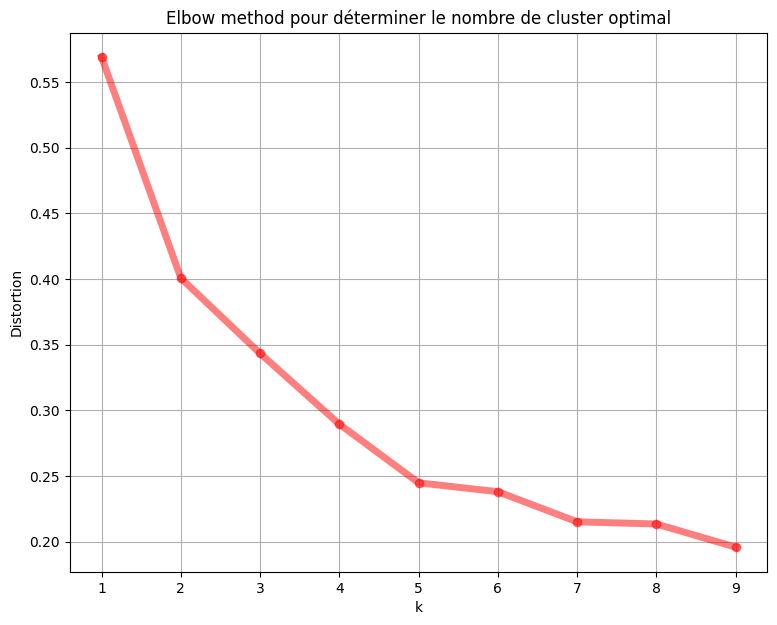

In [61]:
distortions = []
K = range(1,10)
summary = summary.dropna()

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(summary)
    kmeanModel.fit(summary)
    distortions.append(sum(np.min(cdist(summary, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / summary.shape[0])

# Plot
plt.figure(figsize=(9,7))
plt.plot(K, distortions, 'bo-', alpha=0.5, c='red', lw=5)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.grid(True)
plt.title('Elbow method pour déterminer le nombre de cluster optimal')
plt.show()

In [62]:
summar_y = pd.concat([paramètres_consom1, summary4] , axis =1)
del summar_y['Nombre de Mesure  ']

In [63]:
summar_y

,Totale,Minimale,Maximale,Moyenne,"(KWH/hh (per half hour) , mean, Periode 1)","(KWH/hh (per half hour) , mean, Periode 2)","(KWH/hh (per half hour) , mean, Periode 3)","(KWH/hh (per half hour) , mean, Periode 4)"
MAC002543,497.303000,0.016,1.254,0.050534,0.036340,0.060628,0.043949,0.061230
MAC002544,9095.584000,0.046,3.752,0.316401,0.176130,0.235452,0.393088,0.461037
MAC002545,1395.718000,0.006,1.614,0.057945,0.053912,0.060207,0.056349,0.061318
MAC002546,4342.496000,0.032,1.267,0.151301,0.151111,0.127735,0.132429,0.193891
MAC002547,5523.201000,0.034,1.615,0.192138,0.072574,0.172692,0.195169,0.328184
...,...,...,...,...,...,...,...,...
MAC003186,9890.041002,0.077,3.372,0.387586,0.171380,0.362728,0.488869,0.527473
MAC003187,4067.343000,0.023,1.504,0.159385,0.128051,0.175834,0.203196,0.130606
MAC003188,11689.897999,0.054,2.892,0.458050,0.306622,0.491109,0.519955,0.514798
MAC003189,5221.628000,0.004,2.158,0.204553,0.074923,0.205074,0.327304,0.211113


In [78]:
type(summar_y.columns)

pandas.core.indexes.base.Index

In [80]:
summar_y.index = summar_y.index.astype(str)
summar_y = summar_y.dropna()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


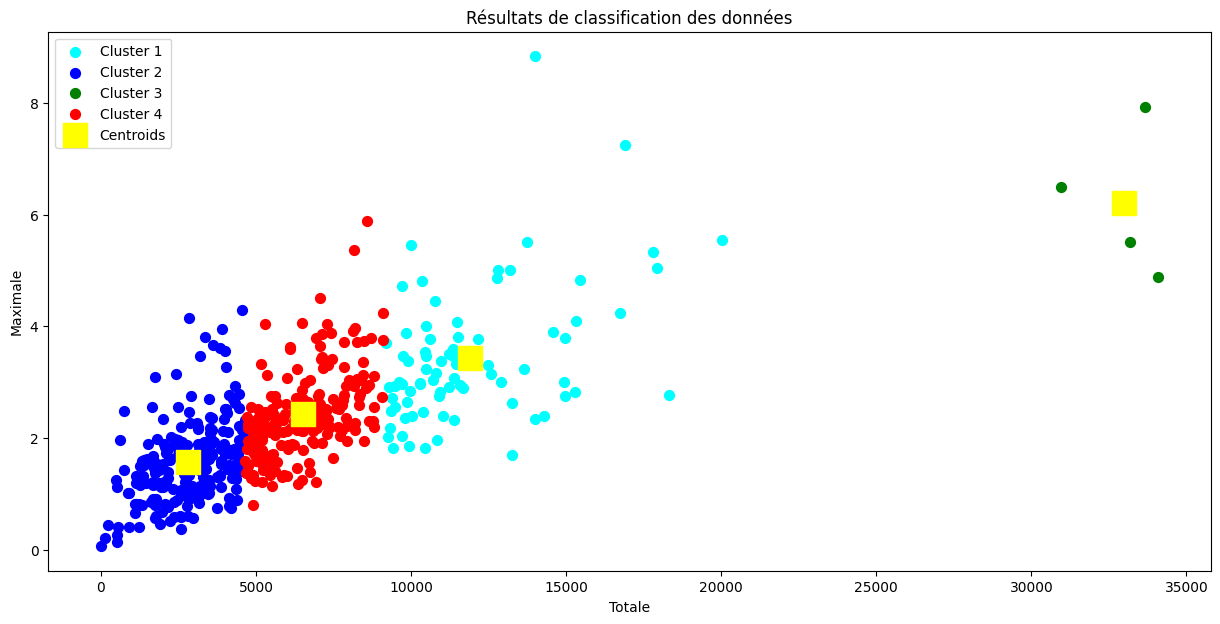

In [82]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(summar_y[['Totale', 'Maximale']])

# Visualising the clusters
plt.figure(figsize=(15, 7))
X = 'Totale'
Y = 'Maximale'

plt.scatter(summar_y[X][y_kmeans == 0], summar_y[Y][y_kmeans == 0], color='cyan', label='Cluster 1', s=50)
plt.scatter(summar_y[X][y_kmeans == 1], summar_y[Y][y_kmeans == 1], color='blue', label='Cluster 2', s=50)
plt.scatter(summar_y[X][y_kmeans == 2], summar_y[Y][y_kmeans == 2], color='green', label='Cluster 3', s=50)
plt.scatter(summar_y[X][y_kmeans == 3], summar_y[Y][y_kmeans == 3], color='red', label='Cluster 4', s=50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', label='Centroids', s=300, marker=',')

plt.grid(False)
plt.title('Résultats de classification des données')
plt.xlabel('Totale')
plt.ylabel('Maximale')
plt.legend()
plt.show()